In [1]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
!ls

EJ_Workbook.ipynb      README.md
LICENSE                texasPowerGrid (1).csv


In [3]:
# reading in CSV for texas data
df0 = pd.read_csv("texasPowerGrid (1).csv")
df0.head()

/Users/admin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),...,Region,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources
0,65148,ERCO,01/01/2018,1,01/01/2018 1:00:00 AM,01/01/2018 7:00:00 AM,"47,834","50,587","50,800",212,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65149,ERCO,01/01/2018,2,01/01/2018 2:00:00 AM,01/01/2018 8:00:00 AM,"48,313","50,650","51,036",385,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,65150,ERCO,01/01/2018,3,01/01/2018 3:00:00 AM,01/01/2018 9:00:00 AM,"49,513","50,737","50,887",150,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65151,ERCO,01/01/2018,4,01/01/2018 4:00:00 AM,01/01/2018 10:00:00 AM,"48,663","51,021","51,419",398,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,65152,ERCO,01/01/2018,5,01/01/2018 5:00:00 AM,01/01/2018 11:00:00 AM,"50,639","51,727","52,048",321,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# exploring columns
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0                                              43200 non-null  int64  
 1   Balancing Authority                                     43200 non-null  object 
 2   Data Date                                               43200 non-null  object 
 3   Hour Number                                             43200 non-null  int64  
 4   Local Time at End of Hour                               43200 non-null  object 
 5   UTC Time at End of Hour                                 43200 non-null  object 
 6   Demand Forecast (MW)                                    43104 non-null  object 
 7   Demand (MW)                                             43080 non-null  object 
 8   Net Generation (MW)                 

In [10]:
# checking 'Balancing Aurthority' column
df0['Balancing Authority'].value_counts()

ERCO    43200
Name: Balancing Authority, dtype: int64

In [13]:
# setting index to UTC datetime
df1 = df0.set_index(pd.to_datetime(df0['UTC Time at End of Hour']))
df1.head()

,Unnamed: 0,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),...,Region,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources
UTC Time at End of Hour,,,,,,,,,,,,,,,,,,,,,
2018-01-01 07:00:00,65148,ERCO,01/01/2018,1,01/01/2018 1:00:00 AM,01/01/2018 7:00:00 AM,"47,834","50,587","50,800",212,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 08:00:00,65149,ERCO,01/01/2018,2,01/01/2018 2:00:00 AM,01/01/2018 8:00:00 AM,"48,313","50,650","51,036",385,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:00:00,65150,ERCO,01/01/2018,3,01/01/2018 3:00:00 AM,01/01/2018 9:00:00 AM,"49,513","50,737","50,887",150,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 10:00:00,65151,ERCO,01/01/2018,4,01/01/2018 4:00:00 AM,01/01/2018 10:00:00 AM,"48,663","51,021","51,419",398,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 11:00:00,65152,ERCO,01/01/2018,5,01/01/2018 5:00:00 AM,01/01/2018 11:00:00 AM,"50,639","51,727","52,048",321,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# creating data frame with datetime index and just 'Total Interchange (MW)' column
df2 = pd.DataFrame(df1['Total Interchange (MW)'])
df2.head()

,Total Interchange (MW)
UTC Time at End of Hour,
2018-01-01 07:00:00,212
2018-01-01 08:00:00,385
2018-01-01 09:00:00,150
2018-01-01 10:00:00,398
2018-01-01 11:00:00,321


In [31]:
# checking data type and # of nulls
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43200 entries, 2018-01-01 07:00:00 to 2022-12-06 06:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Total Interchange (MW)  43075 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [59]:
# dropping nulls
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43075 entries, 2018-01-01 07:00:00 to 2022-12-05 06:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Total Interchange (MW)  43075 non-null  object
dtypes: object(1)
memory usage: 673.0+ KB


In [60]:
# convertng data type to int
df4 = pd.DataFrame(df3['Total Interchange (MW)'].str.replace(',', '').astype(int))

In [61]:
# checking data type
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43075 entries, 2018-01-01 07:00:00 to 2022-12-05 06:00:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Total Interchange (MW)  43075 non-null  int64
dtypes: int64(1)
memory usage: 673.0 KB


In [62]:
df4.head()

,Total Interchange (MW)
UTC Time at End of Hour,
2018-01-01 07:00:00,212
2018-01-01 08:00:00,385
2018-01-01 09:00:00,150
2018-01-01 10:00:00,398
2018-01-01 11:00:00,321


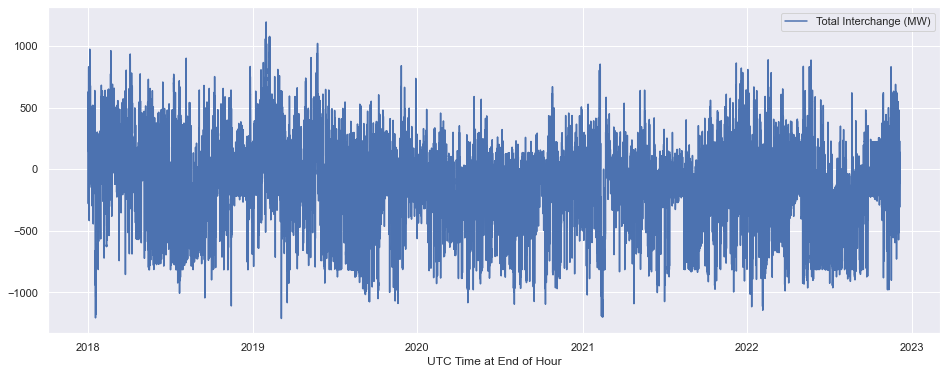

In [64]:
# plotting target column with index
sns.set(rc={'figure.figsize':(16,6)})
sns.lineplot(data=df4);

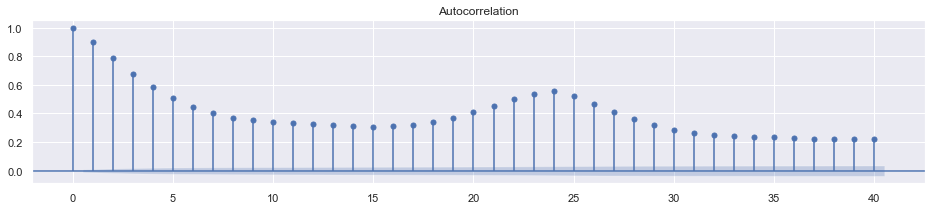

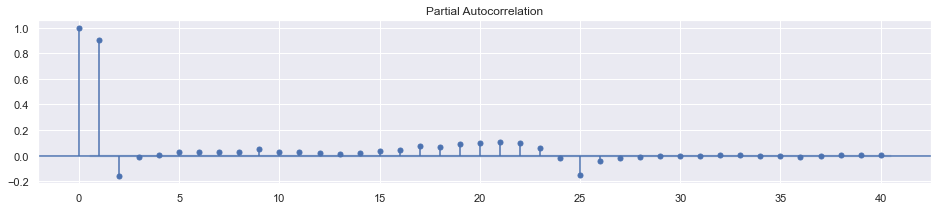

In [73]:
# plotting auto and partial autocorrelation plots
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(df4, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df4, ax=ax, lags=40);

In [72]:
# adjusted dicky fuller test to prove series is stationary
adfuller(df4)[1]

1.0072325540999747e-27

In [ ]:
model0 = SARIMAX(df4, seasonal_order=(1,1,1,720))
res_model0 = model0.fit()
print(res_model0.summary())